# CREACIÓN DE UNA CARTERA DE ACCIONES A TRAVÉS DE LA API DE YAHOO FINANCE

### Importación de Librerias

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

### Recolectar los datos de las acciones que compondran nuestra cartera

In [2]:
assets = ['PG','INTC','AA','VIAC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a]=wb.DataReader(a,data_source='yahoo', start='2010-1-1')['Adj Close']
pf_data

,PG,INTC,AA,VIAC
Date,,,,
2010-01-04,42.731667,14.678100,37.018944,11.968369
2010-01-05,42.745667,14.671074,35.862804,11.909576
2010-01-06,42.542892,14.621859,37.730427,11.531627
2010-01-07,42.312191,14.481265,36.930016,11.758396
2010-01-08,42.256252,14.642954,37.841587,11.884379
...,...,...,...,...
2021-09-27,141.660004,54.660000,51.560001,40.439999
2021-09-28,140.589996,54.000000,50.980000,40.230000
2021-09-29,142.020004,53.490002,50.580002,40.119999


### Evolución del crecimiento porcentual de las acciones

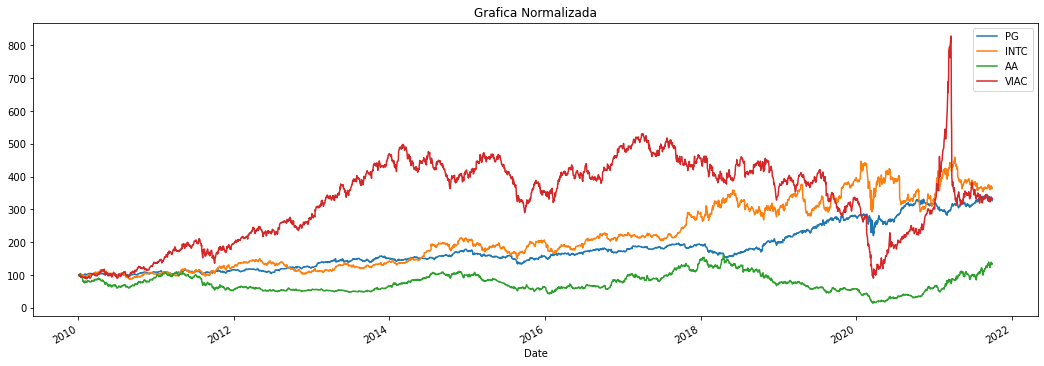

In [3]:

plt.show()

### Calculamos los redimientos logaritmizados diarios de cada acción

In [4]:
log_returns=np.log(pf_data/pf_data.shift(1))
log_returns

,PG,INTC,AA,VIAC
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.000328,-0.000479,-0.031729,-0.004924
2010-01-06,-0.004755,-0.003360,0.050766,-0.032249
2010-01-07,-0.005438,-0.009662,-0.021442,0.019474
2010-01-08,-0.001323,0.011104,0.024384,0.010657
...,...,...,...,...
2021-09-27,-0.013254,0.008082,0.061389,0.011190
2021-09-28,-0.007582,-0.012148,-0.011313,-0.005206
2021-09-29,0.010120,-0.009489,-0.007877,-0.002738


In [5]:
log_returns.mean() *250 

PG      0.100076
INTC    0.109911
AA      0.025024
VIAC    0.101802
dtype: float64

In [6]:
print ("Rendimientos")
print()
print(log_returns.mean() *250)
print()
print("Matriz Var-Cov")
print()
print (log_returns.cov() * 250)
print()
print("Matriz Correlaciones")
print()
print (log_returns.corr()) 

#Hay exactamente 253 días hábiles de negociación en 2020.

Rendimientos

PG      0.100076
INTC    0.109911
AA      0.025024
VIAC    0.101802
dtype: float64

Matriz Var-Cov

            PG      INTC        AA      VIAC
PG    0.028646  0.018063  0.017456  0.016836
INTC  0.018063  0.081675  0.049936  0.037285
AA    0.017456  0.049936  0.202693  0.069692
VIAC  0.016836  0.037285  0.069692  0.142887

Matriz Correlaciones

            PG      INTC        AA      VIAC
PG    1.000000  0.373440  0.229080  0.263163
INTC  0.373440  1.000000  0.388103  0.345141
AA    0.229080  0.388103  1.000000  0.409512
VIAC  0.263163  0.345141  0.409512  1.000000


In [7]:
num_assets=len(assets) #Numero de activos que tiene el portafolio
num_assets

4

### Generación de Pesos

In [8]:
arr = np.random.random(4) #Pesos Aleatorios
print(arr[0])
print(arr[1])
print(arr[2])
print(arr[3])
print()
arr[0] + arr[1] + arr[2] + arr[3]

0.5714650474529861
0.7883538364472249
0.13801084619218484
0.45164787684620233



1.949477606938598

In [9]:

weights

array([0.14805436, 0.14818514, 0.35597273, 0.34778777])

In [10]:
weights.sum()

1.0

### Rentabilidad esperada de la cartera

In [11]:
np.dot(weights,log_returns.mean() *250)

0.07541707058468516

In [12]:
np.sum(weights*log_returns.mean())*250

0.07541707058468518

### Varianza esperada de la cartera

In [13]:
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.07612286523387952

### Volatilidad esperada de la cartera

In [14]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.27590372457413387

 ## Frontera Eficiente (Proceso Monte Carlo)
 En este apartado vamos a encontrar diferentes combinaciones de "pesos" de las acciones en la cartera con la finalidad de elegir la combinación que más se asemeje a nuestros niveles de aversión al riesgo

In [15]:

pfolio_w1=[]
pfolio_w2=[]
pfolio_w3=[]
pfolio_w4=[]
for x in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_w1.append(weights[0])
    pfolio_w2.append(weights[1])
    pfolio_w3.append(weights[2])
    pfolio_w4.append(weights[3])
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))
pfolio_w1=np.array(pfolio_w1)
pfolio_w2=np.array(pfolio_w2)
pfolio_w3=np.array(pfolio_w3)
pfolio_w4=np.array(pfolio_w4)

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
#pfolio_returns,pfolio_volatilities
    

In [16]:
# Creamos un DataFrame
portafolio = pd.DataFrame({'Return':pfolio_returns,"Volatility":pfolio_volatilities,'Weight1':pfolio_w1,"Weight2":pfolio_w2,'Weight3':pfolio_w3,"Weight4":pfolio_w4,"Total":pfolio_w1+pfolio_w2+pfolio_w3+pfolio_w4})
portafolio

,Return,Volatility,Weight1,Weight2,Weight3,Weight4,Total
0,0.083339,0.221858,0.321560,0.248124,0.259445,0.170871,1.0
1,0.097267,0.243611,0.103391,0.475668,0.106977,0.313963,1.0
2,0.077947,0.225379,0.378371,0.262479,0.329917,0.029233,1.0
3,0.085940,0.248941,0.125872,0.379785,0.243882,0.250462,1.0
4,0.094069,0.224591,0.303019,0.205972,0.115664,0.375345,1.0
...,...,...,...,...,...,...,...
9995,0.068154,0.256105,0.338028,0.135257,0.444934,0.081781,1.0
9996,0.074315,0.251466,0.243019,0.298205,0.384038,0.074738,1.0
9997,0.074024,0.256655,0.212103,0.275623,0.386142,0.126132,1.0
9998,0.083528,0.246409,0.169580,0.311972,0.267152,0.251296,1.0


Text(0, 0.5, 'Expected Return')

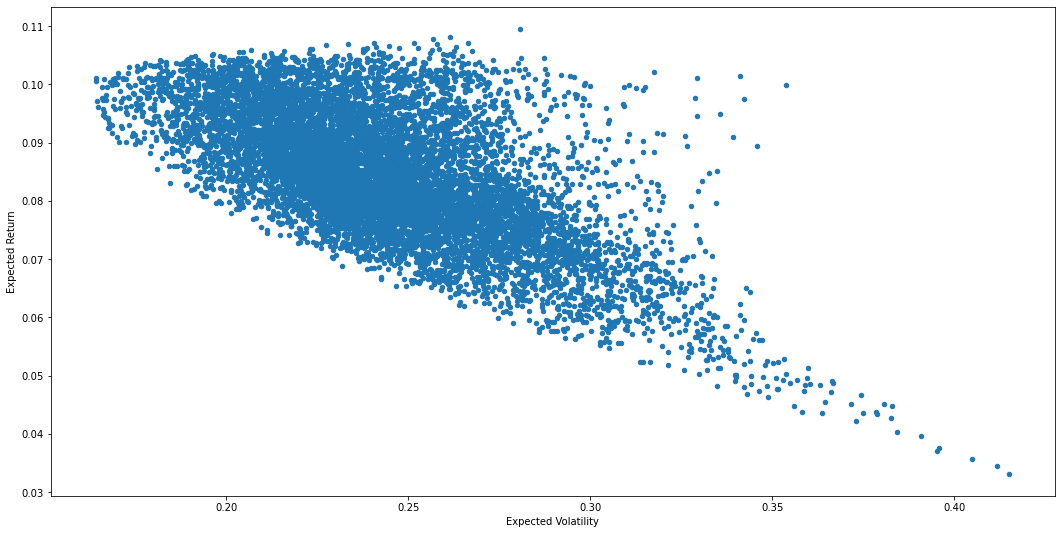

In [17]:
portafolio.plot(x='Volatility',y='Return', kind='scatter', figsize=(18,9))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Monte Carlo - Pronostico de precios de acciones

### Movimiento browniano

$$
daily\_returns = e^{r}
$$
$$
r = drift + stdev \cdot z
$$
$$
drift = u - \frac{1}{2} \cdot var
$$

### Pronosticos
$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$


In [18]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

#drift.values
#stdev.values



daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

Cree una variable S0 igual al último precio de cierre ajustado de Microsoft. Método "iloc".

In [19]:
S0 = data.iloc[-1]
S0

PG    139.580002
Name: 2021-10-01 00:00:00, dtype: float64

Cree una lista de precios variable con la misma dimensión que la matriz de devoluciones diarias.

In [20]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Establezca los valores en la primera fila de la matriz de la lista de precios iguales a S0

In [22]:
price_list[0] = S0
price_list

array([[139.58000183, 139.58000183, 139.58000183, ..., 139.58000183,
        139.58000183, 139.58000183],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Cree un bucle en el rango (1, t_intervals) que reasigne al precio en el tiempo t el producto del precio en el día (t-1) con el valor de los rendimientos diarios en t.

In [23]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [24]:
price_list

array([[139.58000183, 139.58000183, 139.58000183, ..., 139.58000183,
        139.58000183, 139.58000183],
       [140.3303688 , 136.65868551, 139.83914293, ..., 140.52156663,
        138.44848936, 140.21824735],
       [140.92906179, 134.07720681, 140.6332626 , ..., 141.27172204,
        137.95450386, 140.73383203],
       ...,
       [159.29411263, 158.761206  , 179.93249282, ..., 139.68535203,
         94.40050874, 127.48816862],
       [162.86647958, 159.77766646, 178.01392768, ..., 140.87146867,
         94.66379365, 126.47058686],
       [164.90628905, 159.66388832, 181.07251979, ..., 142.52460766,
         95.94426188, 127.78474604]])

Finalmente, grafique los datos de la lista de precios obtenidos.

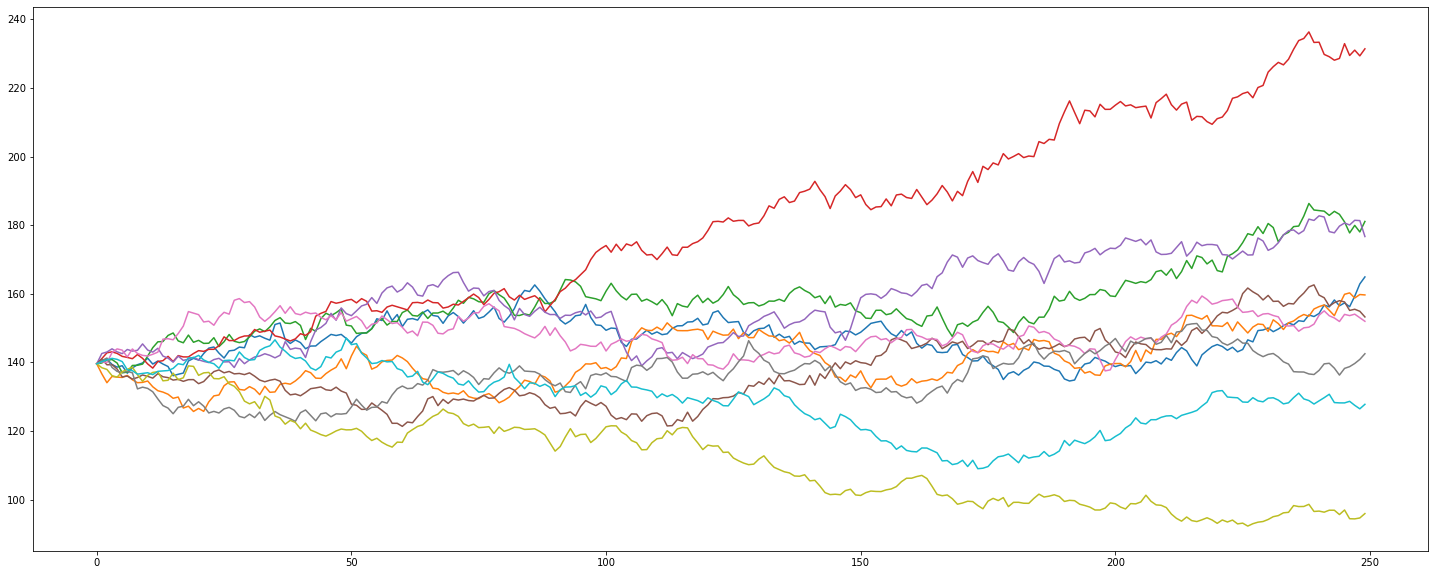

In [25]:
plt.figure(figsize=(25,10))
plt.plot(price_list);

### Wilmer Mateo Heras Vera
Contacto:   
https://mateoheras77.github.io/WEB/   
https://bit.ly/2XYBOFV 